This is for Calculating 3D descriptors from RDKit Smiles_File_Name needs to be YOURSMILENAME.smi(needs to be the file name of your Smiles in .smi) 
Make sure to replace the ./ExampleSmiles.smi with the relevant files

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import rdkit.Chem.Crippen
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
from rdkit.Chem import MolStandardize

import numpy as np

Testing # of SMILES: 7


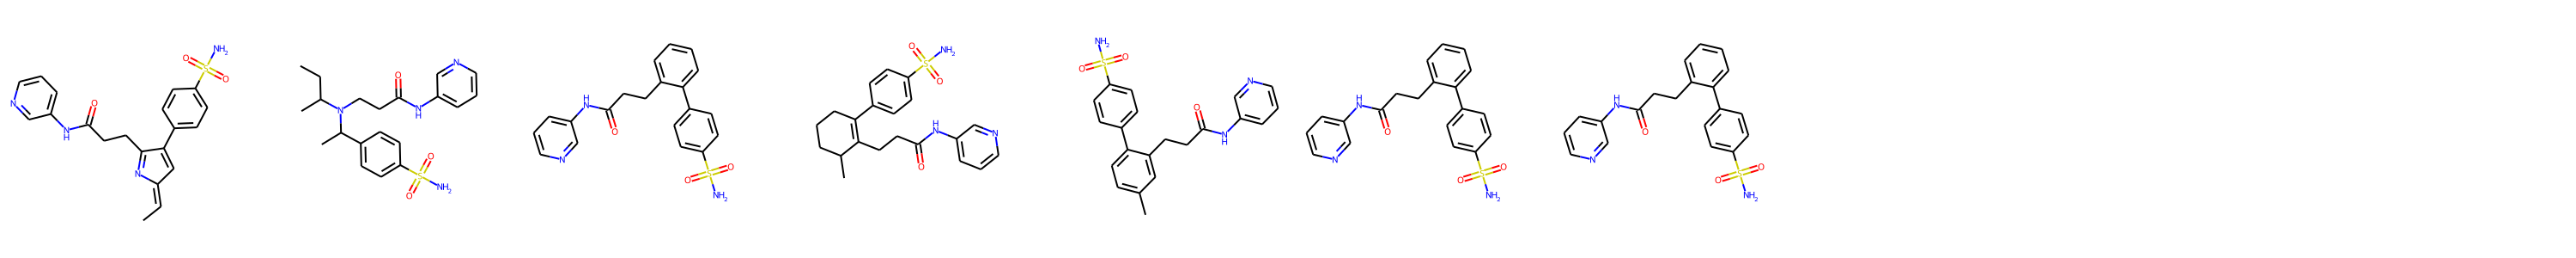

In [2]:
#Loading smi file, Calculating the number of SMILES and a nice diagram of the SMILES
Smiles_File_Name = './ExampleSmiles.smi'

with open(Smiles_File_Name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('Testing # of SMILES:', len(smiles))
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=10, subImgSize=(300, 300))

In [3]:
#Generating the SMILES with hydrogens
suppl = Chem.SmilesMolSupplier('./ExampleSmiles.smi',delimiter='\n',titleLine=False, nameColumn=0)
for mol in suppl:
    AddHs = Chem.AddHs(mol)

In [4]:
# Generating 3D conformers from the SMILES file
for mol in suppl:
    AllChem.EmbedMolecule(AddHs,randomSeed=0xf00d)
    Sup=print(Chem.MolToMolBlock(AddHs))

NS(=O)(=O)c1ccc(-c2ccccc2CCC(=O)Nc2cccnc2)cc1
     RDKit          3D

 46 48  0  0  0  0  0  0  0  0999 V2000
    2.2795    4.1952    0.6869 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.6277    3.1225    0.7763 S   0  0  0  0  0  6  0  0  0  0  0  0
    4.6301    3.5728   -0.2545 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.2491    3.2952    2.1294 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.1225    1.4697    0.5038 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7242    0.6941    1.5716 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3277   -0.6168    1.3229 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3209   -1.1491    0.0709 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8809   -2.4888   -0.1620 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8339   -3.4165   -0.6326 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4925   -4.7244   -0.8409 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2112   -5.1261   -0.5870 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2939   -4.2192   -0.1316 C   0  0  0  0  0  

In [5]:
#Writing the SDF file 
with Chem.SDWriter('data.sdf') as w:
    for m in mols:
        w.write(m)

In [6]:
#Loading in the newly generated SDF file
supp = Chem.SDMolSupplier('data.sdf')

In [7]:
#Calculating the Radius Of Gyration
for mol in supp:
    ROG= Chem.Descriptors3D.RadiusOfGyration(mol)
    print(ROG)

5.150976654392375
4.240075563208182
4.815279927213403
4.179270919001037
4.890365708410894
4.815279927213403
4.815279927213403


In [8]:
#Calculating the Asphericity - molecular asphericity
for mol in supp:
    ASP= Chem.Descriptors3D.Asphericity(mol)
    print(ASP)

0.3706283399147003
0.2835904051925586
0.3729090741067526
0.29603044226494657
0.3259915076952611
0.3729090741067526
0.3729090741067526


In [9]:
#Calculating the Eccentricity - molecular eccentricity
for mol in supp:
    ECC= Chem.Descriptors3D.Eccentricity(mol)
    print(ECC)

0.9541034987411895
0.9190310871953337
0.9546936787670823
0.9265664163204308
0.9401197209662986
0.9546936787670823
0.9546936787670823


In [10]:
#Calculating the Inertial Shape Factor
for mol in supp:
    ISF= Chem.Descriptors3D.InertialShapeFactor(mol)
    print(ISF)

0.00023427802571157407
0.00022716664332034814
0.00028096637457274745
0.0002536964993779955
0.00021602832681041456
0.00028096637457274745
0.00028096637457274745


In [11]:
#Calculating NPR1 - Normalized principal moments ratio 1 (=I1/I3)
for mol in supp:
    NPR1= Chem.Descriptors3D.NPR1(mol)
    print(NPR1)

0.2994770670515879
0.39418505903771
0.2975902883532573
0.3761311953921317
0.3408444076851618
0.2975902883532573
0.2975902883532573


In [12]:
#Calculating NPR2 - Normalized principal moments ratio 2 (=I2/I3)
for mol in supp:
    NPR2= Chem.Descriptors3D.NPR2(mol)
    print(NPR2)

0.7005229329484125
0.6058149409622899
0.7024097116467427
0.6238688046078675
0.6591555923148388
0.7024097116467427
0.7024097116467427


In [13]:
#Calculating PMI1 - First (smallest) principal moment of inertia
for mol in supp:
    PMI1= Chem.Descriptors3D.PMI1(mol)
    print(PMI1)

2990.13503644104
2666.830535097425
2499.977845088632
2459.1147538001037
3051.2461122439313
2499.977845088632
2499.977845088632


In [14]:
#Calculating PMI2 - Second principal moment of inertia
for mol in supp:
    PMI2= Chem.Descriptors3D.PMI2(mol)
    print(PMI2)

6994.38586821294
4098.597209951381
5900.759487176089
4078.802823699357
5900.774350601308
5900.759487176089
5900.759487176089


In [17]:
#Calculating PMI3 - Third (largest) principal moment of inertia
for mol in supp:
    PMI3= Chem.Descriptors3D.PMI3(mol)
    print(PMI3)

9984.520904653977
6765.427745048807
8400.737332264722
6537.917577499466
8952.020462845234
8400.737332264722
8400.737332264722


In [16]:
#Calculating Spherocity Index - Molecular spherocityIndex
for mol in supp:
    SPI= Chem.Descriptors3D.SpherocityIndex(mol)
    print(SPI)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
